In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing Data

In [164]:
df=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


# Cleaning Data

In [4]:
# check columns having null values.
df.isnull()

,order_id,quantity,item_name,choice_description,item_price
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,False,False
...,...,...,...,...,...
4617,False,False,False,False,False
4618,False,False,False,False,False
4619,False,False,False,False,False
4620,False,False,False,False,False


In [8]:
# Replacing Null value with NA.
df['choice_description'].fillna('NA',inplace=True)

In [9]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NA,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NA,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  4622 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


**Which was the most-ordered item?**

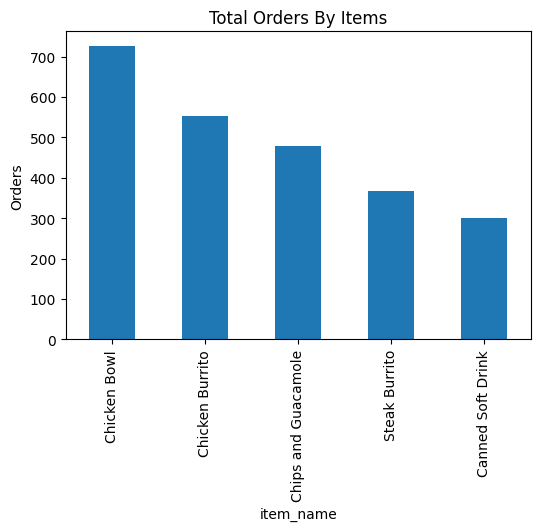

In [124]:
items_ordered=df['item_name'].value_counts().head()
items_ordered.plot(kind = 'bar', x = 'item_name', y = 'order_id',figsize=(6,4),title='Total Orders By Items', ylabel='Orders')
plt.show()

**For the most-ordered item, how many items were ordered?**

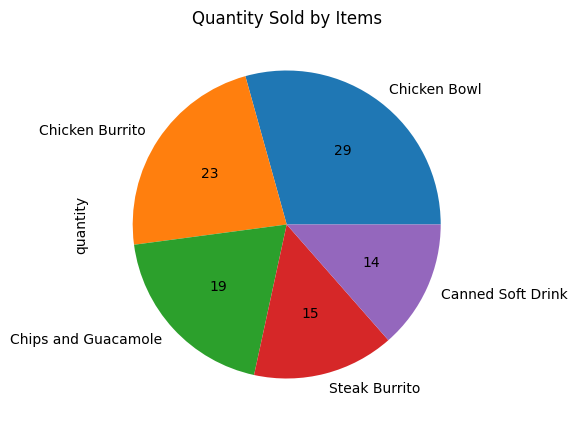

In [132]:
item_quantity=df.groupby(['item_name'])['quantity'].sum().sort_values(ascending=False).head()
item_quantity.plot(kind = 'pie', x = 'item_name', y = 'quantity',figsize=(5,5),title='Quantity Sold by Items',legend=False, autopct='%.f')
plt.show()

**What was the most ordered item in the choice_description column?**

In [141]:
newdf=df['choice_description'].value_counts().head()
newdf

choice_description
[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: count, dtype: int64

**How many items were ordered in total?**

In [172]:
df['quantity'].sum()

4972

**Turn the item price into a float**

In [165]:
df['item_price']=df['item_price'].map(lambda x: float(x[1:]))
df.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

**How much was the revenue for the period in the dataset?**

In [169]:
revenue=df['quantity']*df['item_price']
round(sum(revenue),2)

39237.02

**How many orders were made in the period?**

In [173]:
df['order_id'].count()

4622

**What is the average revenue amount per order?**

In [179]:
round((df['quantity']*df['item_price']).mean(),2)

8.49

In [182]:
round(sum(revenue)/df['order_id'].count(),2)

8.49

**How many different items are sold?**

In [183]:
df['item_name'].nunique()

50